In [1]:
import dm_den_viz
import dm_den
import paths
import cropper
import numpy as np
import pandas as pd
from IPython.display import display, Latex
from astropy import units as u, constants as c

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['axes.labelsize']=15.
rcParams['xtick.labelsize'] = 12.
rcParams['ytick.labelsize'] = 12.
rcParams['figure.dpi'] = 110.
rcParams['figure.facecolor'] = (1.,1.,1.,1.)

mls = 11. #marker label size
result_figsize = (4.5,3.5) #figure size for the main result plots (rho & sigma)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

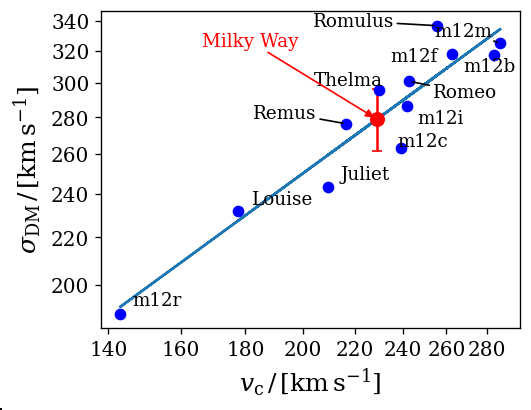

array([[[278.96879764]],

       [[ 17.33974949]]])

In [3]:
dm_den_viz.plt_vs_vc('disp_dm_disc_cyl', tgt_fname='disp_vs_vphi.png',
                     update_val=True,
                     figsize=result_figsize, labelsize=mls, 
                     minarrow=20.,
                     adjust_text_kwargs={'expand_points':(1.5,1.5),
                                         #'force_points':(.2,2.),
                                         'expand_text':(1.05,2.),
                                         'expand_objects':(1.3,1.3),
                                         'force_objects':(0.3,0.3)
                     },
                     dpi_show=120, xtickspace=20., ytickspace=20.)

====  ========  ========  ========  ===========
..       coeff       +/-    t-stat     p-values
====  ========  ========  ========  ===========
X_0   5.15953   0.99848   11.5136   4.30672e-07
X_1   0.799033  0.422996   4.20892  0.001803
====  ========  ========  ========  ===========
t_c = 2.2
t-test type: 2 tailed, 5% significance

======  =======  ==============
     F      F_c    significance
======  =======  ==============
17.715  10.0443            0.01
======  =======  ==============
r2 = 0.64
r2a = 0.60
[[1.         2.35983548]]
(1, 2)
[[1.         2.35983548]]
(1, 2)
[[5.1595302 ]
 [0.79903283]]
(2, 1)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 2

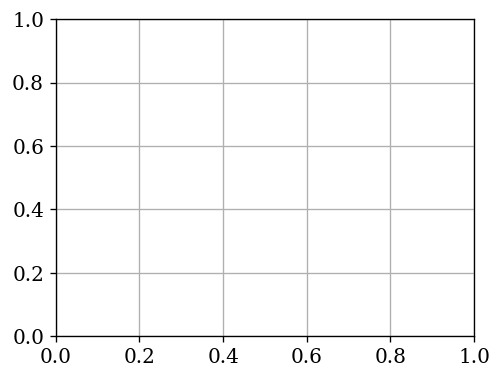

In [3]:
rho_hat = dm_den_viz.plt_vs_vc('den_disc', tgt_fname='den_vs_vphi.png',
                               update_val=True,
                               minarrow=0.03,
                               adjust_text_kwargs={'expand_points':(1.5,1.5),
                                                   #'force_points':(1.2,1.3)
                                                  },
                               figsize=result_figsize, labelsize=mls, 
                               verbose=True,
                               v0=dm_den_viz.v0_eilers,
                               dv0=dm_den_viz.dv0_eilers,
                               dpi_show=120,
                               xtickspace=20.)

100% |########################################################################|


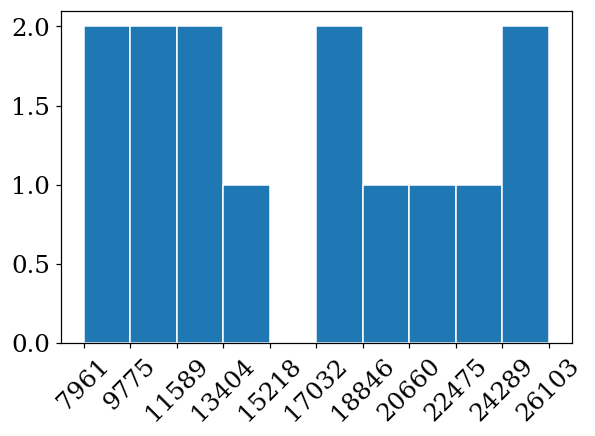

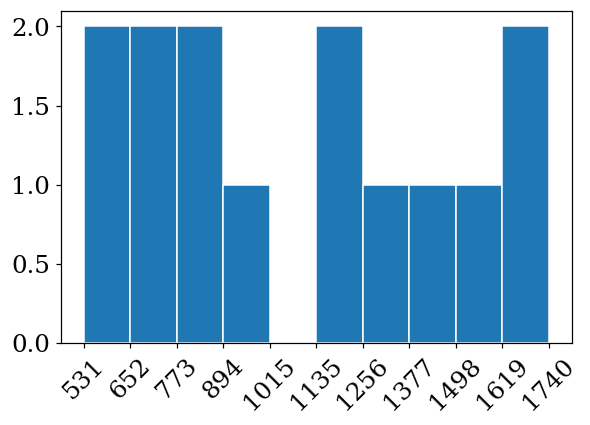

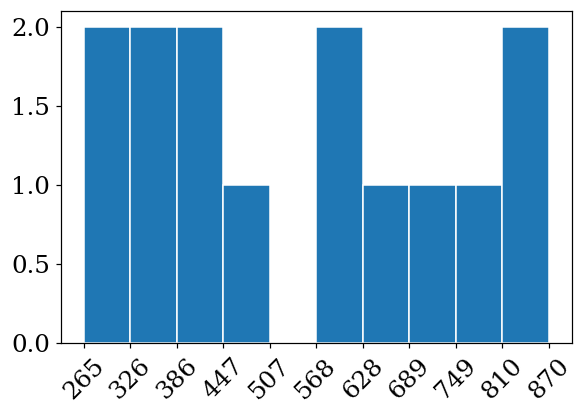

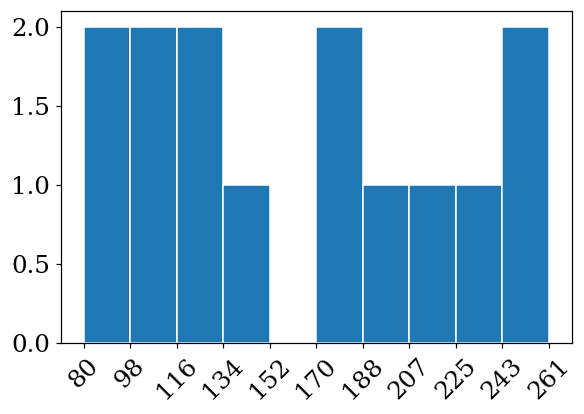

In [27]:
reload(dm_den_viz)
dm_den_viz.plt_particle_counts()

0.5215043804959058


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

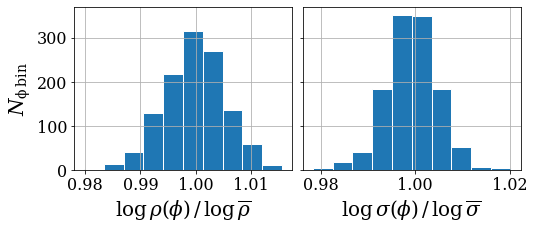

1.7383479349863522


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

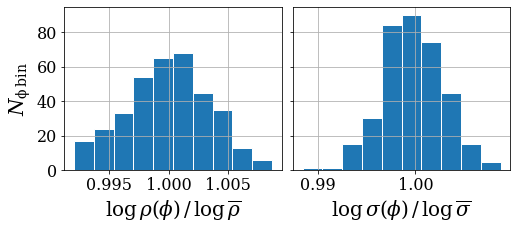

2.6075219024795286


In [14]:
print(2.*np.pi/100.*8.3)
dm_den_viz.plt_disc_diffs(diff_source='den_disp_dict_N100_20220927.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)
print(2.*np.pi*8.3/30.)
dm_den_viz.plt_disc_diffs(diff_source='den_disp_dict_N30_20220927.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)

3.4766958699727044


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

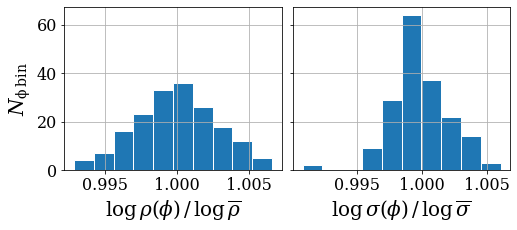

In [16]:
print(2.*np.pi*8.3/15.)
reload(dm_den_viz)
reload(dm_den)
import staudt_utils
reload(staudt_utils)
dm_den_viz.plt_disc_diffs(only_log=True, figsize=(8,3),
                          tgt_fname='disc_diffs.png',
                          update_val=True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

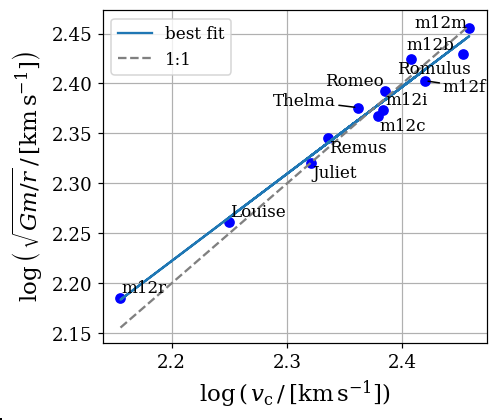

In [316]:
dm_den_viz.plt_gmr_vs_vc(figsize=(4.5,4), minarrow=0.03)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

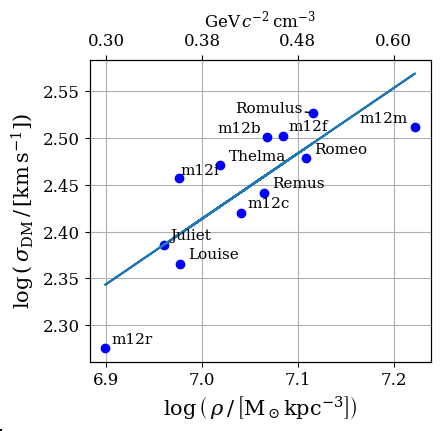

In [174]:
_ = dm_den_viz.plt_slr('dm_stats_20220715.h5',
                   'den_disc', 'disp_dm_disc_cyl',
                   dm_den_viz.den_label, dm_den_viz.disp_label,
                   'log', 'log', dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'expand_points':(1.3,1.3)},
                   labelsize=mls, show_formula='outside',
                   tgt_fname='disp_vs_den.png', minarrow=0.04, 
                   #ax_slr_kwargs={'prediction_x':[[dm_den_viz.rho_sofu],
                   #                               10.**rho_hat[0][0]],
                   #               'dX':[[dm_den_viz.drho_sofu],
                   #                      rho_hat[1][0] \
                   #                      *np.sqrt(10.**(rho_hat[0][0][0]*2.) \
                   #                               * np.log(10.)**2.)]}
                      )
# The extra math on the error bar from my prediction is to get the
# log error bar into a linear error bar that the program will then
# convert back into the original error bar. (The program expects linear
# error bars, even though it might display log error bars in the end.)

#print(_)

In [175]:
reload(paths)
df = dm_den.load_data('dm_stats_20220715.h5').drop(['m12w', 'm12z'])
cor_df = df \
    [['disp_dm_disc_cyl',
      'den_disc',
      'v_dot_phihat_disc(T<=1e3)',
      'vcirc']] \
    .rename(columns={'disp_dm_disc_cyl': '$\sigma_\mathrm{3D}$', 
                     'den_disc': '$\rho$',
                     'v_dot_phihat_disc(T<=1e3)': '$v_c$',
                     'vcirc': '$\sqrt{Gm/R_0}$'}) \
    .corr()
for i in range(cor_df.shape[0]):
    for j in range(cor_df.shape[1]):
        if j>i:
            cor_df.iloc[i,j] = ''
caption = 'Correlations between the four variables of interest'
with open(paths.tables+'corr.tex','w') as tf:
    tf.write(cor_df.to_latex(escape=False,
                             float_format='{:0.2f}'.format,
                             caption=caption,
                             label='table:corr'))
cor_df

,$\sigma_\mathrm{3D}$,$\rho$,$v_c$,$\sqrt{Gm/R_0}$
$\sigma_\mathrm{3D}$,1.000000,,,
$\rho$,0.784196,1,,
$v_c$,0.929061,0.778319,1,
$\sqrt{Gm/R_0}$,0.963847,0.829554,0.984716,1
